In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import folium

# Data PreProcessing - Defining target variable(Severity score)

In [3]:
file_path = "C:/Users/reddy/Desktop/606/Project/Crime.csv"
df = pd.read_csv(file_path)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892929,241604405,1/14/2024 0:00,1/13/2024 0:00,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
892930,241604246,1/8/2024 0:00,1/8/2024 0:00,800,16,Foothill,1601,2,625,OTHER ASSAULT,...,IC,Invest Cont,625.0,NaN,NaN,NaN,VAUGHN ST,DE GARMO AV,34.2865,-118.4161
892931,242004546,1/16/2024 0:00,1/16/2024 0:00,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
892932,240705409,2/2/2024 0:00,1/31/2024 0:00,30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2300 S SYCAMORE AV,NaN,34.0360,-118.3527


In [74]:
columns_to_drop = ['DR_NO', 'Rpt Dist No', 'Mocodes', 'Vict Descent', 'Status','Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']

df_1 = df.drop(columns=columns_to_drop)

df_1.dropna(subset=['Premis Cd', 'Premis Desc'], inplace=True)


In [115]:
crime_categories = {
    'Violent Crimes': ['HOMICIDE', 'ROBBERY', 'KIDNAPPING', 'ASSAULT WITH DEADLY WEAPON', 'BATTERY - SIMPLE ASSAULT', 'AGGRAVATED ASSAULT', 'INTIMATE PARTNER', 'CRIMINAL THREATS', 'BRANDISH WEAPON', 'SEXUAL PENETRATION', 'CHILD ABUSE', 'DISCHARGE FIREARMS', 'SHOTS FIRED', 'RAPE', 'CRIMINAL HOMICIDE', 'ORAL COPULATION', 'LEWD CONDUCT', 'SODOMY', 'RAPE, ATTEMPTED', 'CHILD STEALING', 'KIDNAPPING - GRAND ATTEMPT', 'BATTERY WITH SEXUAL CONTACT', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'SEXUAL ASSAULT', 'BEASTIALITY', 'LYNCHING', 'LYNCHING - ATTEMPTED', 'RESISTING ARREST', 'BATTERY POLICE (SIMPLE)'],
    'Property Crimes': ['BURGLARY', 'VEHICLE - STOLEN', 'THEFT', 'ARSON', 'VANDALISM', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE', 'SHOPLIFTING', 'BUNCO', 'EMBEZZLEMENT', 'FORGERY', 'EXTORTION', 'COUNTERFEIT', 'GRAND THEFT', 'TILL TAP', 'THEFT, COIN MACHINE', 'PICKPOCKET', 'DEFRAUDING INNKEEPER', 'BUNCO, ATTEMPT', 'BIKE - STOLEN','BIKE - ATTEMPTED STOLEN', 'VEHICLE - ATTEMPT STOLEN', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'BOAT - STOLEN', 'TELEPHONE PROPERTY - DAMAGE'],
    'Drug/Alcohol Related': ['DRUNK ROLL', 'DRUGS, TO A MINOR'],
    'Sex Crimes': ['SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'INDECENT EXPOSURE', 'PEEPING TOM', 'CHILD PORNOGRAPHY', 'CHILD MOLEST', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE','LEWD/LASCIVIOUS ACTS WITH CHILD', 'STALKING'],
    'Theft/Fraud': ['PURSE SNATCHING', 'PURSE SNATCHING - ATTEMPT', 'THEFT OF IDENTITY', 'CREDIT CARDS, FRAUD USE', 'UNAUTHORIZED COMPUTER ACCESS', 'DOCUMENT FORGERY', 'DOCUMENT WORTHLESS', 'CONTEMPT OF COURT', 'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'FAILURE TO YIELD', 'FAILURE TO DISPERSE', 'FALSE POLICE REPORT', 'FALSE IMPRISONMENT', 'ILLEGAL DUMPING', 'TRAIN WRECKING'],
    'Traffic Violations': ['FAILURE TO YIELD', 'RECKLESS DRIVING', 'DRIVING WITHOUT OWNER CONSENT (DWOC)'],
    'Weapons Violation': ['BRANDISH WEAPON', 'WEAPONS POSSESSION'],
    'Non-Violent Miscellaneous': ['TRESPASSING', 'DISORDERLY CONDUCT', 'DISTURBING THE PEACE', 'OTHER MISCELLANEOUS CRIME', 'CONSPIRACY', 'INCITING A RIOT', 'CHILD ABANDONMENT', 'BIGAMY', 'BRIBERY', 'CONTRIBUTING', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'THREATENING PHONE CALLS/LETTERS', 'PROWLER', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'DISRUPT SCHOOL', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 'BLOCKING DOOR INDUCTION CENTER', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'OTHER ASSAULT'],
    'Domestic Violence': ['INTIMATE PARTNER - SIMPLE ASSAULT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'VIOLATION OF RESTRAINING ORDER', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'CHILD NEGLECT', 'CHILD ANNOYING', 'CHILD ABUSE', 'DOMESTIC VIOLENCE'],
    'Serious Violations': ['ASSAULT ON POLICE OFFICER', 'KIDNAPPING', 'THROWING OBJECT AT MOVING VEHICLE', 'BOMB SCARE', 'HUMAN TRAFFICKING', 'KIDNAPPING - GRAND ATTEMPT', 'PANDERING', 'PIMPING', 'CRUELTY TO ANIMALS', 'HOMICIDE','MANSLAUGHTER, NEGLIGENT' , 'BATTERY ON A FIREFIGHTER']
}

default_category = 'Other'

severity_scores = {
    'Violent Crimes': 10,
    'Property Crimes': 7,
    'Drug/Alcohol Related': 5,
    'Sex Crimes': 9,
    'Theft/Fraud': 6,
    'Traffic Violations': 4,
    'Weapons Violation': 8,
    'Non-Violent Miscellaneous': 3,
    'Domestic Violence': 7,
    'Serious Violations': 9
}

def categorize_crime_description(crime_desc):
    for category, keywords in crime_categories.items():
        if any(keyword in crime_desc.upper() for keyword in keywords):
            return category
    return default_category

df_1['Crime Description'] = df_1['Crm Cd Desc'].apply(categorize_crime_description)

df_1['Severity_Crime'] = df_1['Crime Description'].map(severity_scores)

df_1.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,LAT,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon,Premise Description,Severity_Premise,Severity,Hour,Minute,Month,Day,Year,Weapons Used
0,03-01-2020,03-01-2020,21:00,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,101.0,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,21,00,03,01,2020,0
1,02-09-2020,02-08-2020,18:00,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,18,00,02,09,2020,0
2,11-11-2020,11-04-2020,17:00,3,Southwest,1,480,BIKE - STOLEN,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Property Crimes,7,No Weapon,0.0,Residential,7.0,4.9,17,00,11,11,2020,0
3,05-10-2023,03-10-2020,20:00,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,405.0,CLOTHING STORE,NaN,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Property Crimes,7,No Weapon,0.0,Business/Commercial,6.0,4.7,20,00,05,10,2023,0
4,08-18-2022,08-17-2020,12:00,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,102.0,SIDEWALK,NaN,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,12,00,08,18,2022,0


In [76]:

weapon_categories = {
    'Firearms': ['HAND GUN', 'SEMI-AUTOMATIC PISTOL', 'UNKNOWN FIREARM', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'AUTOMATIC WEAPON', 'SUB-MACHINE GUN', 'ASSAULT WEAPON', 'HECKLER & KOCH', 'UZI SEMIAUTOMATIC ASSAULT RIFLE', 'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON', 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON', 'M1-1 SEMIAUTOMATIC ASSAULT RIFLE', 'M-14 SEMIAUTOMATIC ASSAULT RIFLE'],
    'Knives/Bladed Objects': ['KNIFE', 'BLADE', 'MACHETE', 'SWITCH BLADE', 'DIRK/DAGGER', 'BOWIE KNIFE', 'ICE PICK', 'RAZOR BLADE', 'RAZOR', 'STRAIGHT RAZOR'],
    'Blunt Objects': ['CLUB/BAT', 'BLUNT INSTRUMENT', 'HAMMER', 'TIRE IRON', 'BRASS KNUCKLES', 'BLACKJACK'],
    'Personal Weapons/Physical Force': ['STRONG-ARM', 'PHYSICAL PRESENCE'],
    'Explosives/Flammable Objects': ['EXPLOXIVE DEVICE', 'FIRE', 'BOMB THREAT'],
    'Chemical/Nontraditional Weapons': ['MACE/PEPPER SPRAY', 'CAUSTIC CHEMICAL/POISON', 'SCALDING LIQUID'],
    'Threats': ['VERBAL THREAT', 'DEMAND NOTE'],
    'Miscellaneous Objects': ['ROCK/THROWN OBJECT', 'PIPE/METAL PIPE', 'BOTTLE', 'STICK', 'FOLDING KNIFE', 'KITCHEN KNIFE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'OTHER CUTTING INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'SCREWDRIVER', 'CONCRETE BLOCK/BRICK', 'BELT FLAILING INSTRUMENT/CHAIN', 'SCISSORS', 'FIXED OBJECT', 'GLASS', 'AXE', 'BOARD', 'TOY GUN', 'VEHICLE', 'ROPE/LIGATURE', 'STARTER PISTOL/REVOLVER', 'CLEAVER', 'SAWED OFF RIFLE/SHOTGUN', 'BOW AND ARROW', 'SYRINGE', 'MARTIAL ARTS WEAPONS', 'RELIC FIREARM', 'ANTIQUE FIREARM'],
    'Simulated/Toy Weapons': ['SIMULATED GUN', 'TOY GUN'],
    'Unknown Weapons': ['UNKNOWN WEAPON/OTHER WEAPON']
}

weapon_severity_scores = {
    'Firearms': 10,
    'Knives/Bladed Objects': 8,
    'Blunt Objects': 6,
    'Personal Weapons/Physical Force': 4,
    'Explosives/Flammable Objects': 9,
    'Chemical/Nontraditional Weapons': 5,
    'Threats': 3,
    'Miscellaneous Objects': 2,
    'Simulated/Toy Weapons': 1,
    'Unknown Weapons': 2, 
    'Unknown or Miscellaneous' : 2
}

def categorize_weapon_description(weapon_desc):
    if pd.isna(weapon_desc):
        return 'No Weapon'
    for category, keywords in weapon_categories.items():
        if any(keyword in weapon_desc.upper() for keyword in keywords):
            return category
    return 'Unknown Weapons'

df_1['Weapon Description'] = df_1['Weapon Desc'].apply(categorize_weapon_description)

df_1['Severity_Weapon'] = df_1['Weapon Description'].map(weapon_severity_scores)

df_1.loc[df_1['Weapon Desc'].isna(), 'Severity_Weapon'] = 0

df_1.head()


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,LAT,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon
0,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,101.0,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Property Crimes,7,No Weapon,0.0
1,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Property Crimes,7,No Weapon,0.0
2,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Property Crimes,7,No Weapon,0.0
3,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,405.0,CLOTHING STORE,NaN,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Property Crimes,7,No Weapon,0.0
4,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,102.0,SIDEWALK,NaN,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Property Crimes,7,No Weapon,0.0


In [77]:


premise_categories = {
    'Residential': [
        'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING', 'APARTMENT', 'DUPLEX', 'CONDOMINIUM/TOWNHOUSE', 
        'MOBILE HOME', 'TRAILERS', 'RV\'S', 'MOTORHOME', 'GARAGE/CARPORT', 'DRIVEWAY', 'PORCH', 'YARD', 
        'RESIDENTIAL', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS', 'TRANSITIONAL HOUSING/HALFWAY HOUSE', 
        'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME', 'PORCH, RESIDENTIAL', 'GROUP HOME', 
        'ABANDONED BUILDING ABANDONED HOUSE', 'OTHER RESIDENCE'
    ],
    'Business/Commercial': [
        'OTHER BUSINESS', 'RESTAURANT/FAST FOOD', 'DEPARTMENT STORE', 'MARKET', 'CYBERSPACE', 'CLOTHING STORE', 
        'OTHER STORE', 'DRUG STORE', 'MINI-MART', 'BANK', 'LAUNDROMAT', 'DISCOUNT STORE', 'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*', 
        'AUTO REPAIR SHOP', 'THE BEVERLY CENTER', 'THE BEVERLY CONNECTION', 'WEBSITE', 
        'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)', 'BEAUTY/BARBER SHOP', 'LIQUOR STORE', 'CELL PHONE STORE', 
        'NIGHT CLUB', 'BAR/COCKTAIL/NIGHTCLUB', 'COFFEE SHOP', 'SHOPPING MALL', 'CONSTRUCTION SITE', 'WAREHOUSE', 
        'FACTORY', 'AUTO SALES LOT', 'GUN/SPORTING GOODS', 'ELECTRONICS STORE', 'JEWELRY STORE', 'PAWN SHOP', 
        'RECYCLING CENTER', 'SWAP MEET', 'THEATRE/MOVIE', 'ENTERTAINMENT/COMEDY CLUB', 'BEAUTY SUPPLY STORE', 
        'TATTOO PARLOR*', 'VIDEO RENTAL STORE', 'SKATING RINK*', 'GAS STATION', 'OFFICE BUILDING/OFFICE', 
        'MAIL BOX', 'PHARMACY INSIDE STORE OR SUPERMARKET*', 'HARDWARE/BUILDING SUPPLY', 'NAIL SALON', 
        'CLEANER/LAUNDROMAT', 'AUTO SUPPLY STORE*', 'TOBACCO SHOP', 'CHECK CASHING*', 
        'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*', 'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)', 
        'PET STORE', 'MASSAGE PARLOR', 'GOLF COURSE*', 'PUBLIC RESTROOM(INDOORS-INSIDE)', 'FRAT HOUSE/SORORITY/DORMITORY', 
        'STAIRWELL*', 'ELEVATOR', 'SPORTS ARENA', 'STAPLES CENTER *', 'SLIPS/DOCK/MARINA/BOAT', 'UNDERPASS/BRIDGE*', 
        'VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)', 'MANUFACTURING COMPANY', 'DAY CARE/ADULTS*', 
        'FURNITURE STORE', 'DAY CARE/CHILDREN*', 'PUBLIC RESTROOM/OUTSIDE*', 'BUS, SCHOOL, CHURCH', 
        'SHORT-TERM VACATION RENTAL', 'RIVER BED*', 'VALET', 'EQUIPMENT RENTAL', 'METROLINK TRAIN', 
        'SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN\'S CLUB', 'CEMETARY*', 'VISION CARE FACILITY*', 'PAWN SHOP', 
        'FACTORY', 'BOWLING ALLEY*', 'CREDIT UNION', 'POOL-PUBLIC/OUTDOOR OR INDOOR*', 'GREYHOUND OR INTERSTATE BUS', 
        'OTHER PLACE OF WORSHIP', 'TATTOO PARLOR*', 'FINANCE COMPANY', 'SKATEBOARD FACILITY/SKATEBOARD PARK*', 
        'BOOK STORE', 'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*', 'TELECOMMUNICATION FACILITY/LOCATION', 
        'VETERINARIAN/ANIMAL HOSPITAL', 'SAVINGS & LOAN', 'ENERGY PLANT/FACILITY', 'FOSTER HOME BOYS OR GIRLS*', 
        'MORTUARY', 'AMUSEMENT PARK*', 'TRASH CAN/TRASH DUMPSTER', 'WATER FACILITY', 'TV/RADIO/APPLIANCE', 
        'COMPUTER SERVICES/REPAIRS/SALES', 'AIRCRAFT', 'RECORD-CD MUSIC/COMPUTER GAME STORE', 'DAM/RESERVOIR', 
        'HOSPICE', 'TOOL SHED*', 'OIL REFINERY', 'CULTURAL SIGNIFICANCE/MONUMENT', 'BANKING INSIDE MARKET-STORE *', 
        'PEDESTRIAN OVERCROSSING', 'GARMENT MANUFACTURER', 'TRUCK, COMMERCIAL', 'PAY PHONE', 'OTHER INTERSTATE, CHARTER BUS', 
        'METHADONE CLINIC', 'MASS GATHERING LOCATION', 'ABATEMENT LOCATION', 'SURPLUS SURVIVAL STORE', 'ESCALATOR*', 
        'SKATING RINK*', 'HOCKEY RINK/ICE HOCKEY', 'MUSCLE BEACH', 'VIDEO RENTAL STORE', 'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*', 
        'CHEMICAL STORAGE/MANUFACTURING PLANT', 'HANDBALL COURTS', 'HORSE RACING/SANTA ANITA PARK*', 'SEWAGE FACILITY/PIPE', 
        'TRAM/STREETCAR(BOXLIKE WAGON RAILS)*', 'ABORTION CLINIC/ABORTION FACILITY*'
    ],
    'Transportation': [
        'STREET', 'SIDEWALK', 'VEHICLE, PASSENGER/TRUCK', 'PARKING LOT', 'PARKING UNDERGROUND/BUILDING', 
        'TRANSPORTATION FACILITY (AIRPORT)', 'MTA BUS', 'AUTOMATED TELLER MACHINE (ATM)', 'LA UNION STATION', 
        'PUBLIC STORAGE', 'MTA - RED LINE - WESTLAKE/MACARTHUR PARK', 'MTA - RED LINE - NORTH HOLLYWOOD', 
        'MTA PROPERTY OR PARKING LOT', 'MTA - RED LINE - 7TH AND METRO CENTER', 'MTA - RED LINE - WILSHIRE/VERMONT', 
        'MTA - RED LINE - PERSHING SQUARE', 'MTA - RED LINE - UNION STATION', 'FREEWAY', 'MTA - RED LINE - HOLLYWOOD/HIGHLAND', 
        'MTA - RED LINE - VERMONT/BEVERLY', 'MTA - RED LINE - HOLLYWOOD/VINE', 'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY', 
        'MTA - RED LINE - VERMONT/SANTA MONICA', 'MTA - RED LINE - HOLLYWOOD/WESTERN', 'TAXI', 'TRAIN TRACKS', 
        'PUBLIC RESTROOM(INDOORS-INSIDE)', 'MTA - RED LINE - CIVIC CENTER/GRAND PARK', 'MTA - RED LINE - VERMONT/SUNSET', 
        'MTA - EXPO LINE - EXPO/WESTERN', 'MUNICIPAL BUS LINE INCLUDES LADOT/DASH', 'DETENTION/JAIL FACILITY', 
        'TOW YARD*', 'MTA - EXPO LINE - EXPO/CRENSHAW', 'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE', 
        'MTA - EXPO LINE - LA CIENEGA/JEFFERSON', 'MTA - EXPO LINE - EXPO/SEPULVEDA', 'MTA - EXPO LINE - JEFFERSON/USC', 
        'MTA - EXPO LINE - EXPO/BUNDY', 'MTA - EXPO LINE - EXPO/PICO', 'MTA - EXPO LINE - 7TH AND METRO CENTER', 
        'MTA - EXPO LINE - WESTWOOD/RANCHO PARK', 'MTA - ORANGE LINE - VAN NUYS', 'MTA - ORANGE LINE - CANOGA', 
        'MTA - ORANGE LINE - CHATSWORTH', 'MTA - ORANGE LINE - BALBOA', 'MTA - ORANGE LINE - SEPULVEDA', 'MTA - ORANGE LINE - WOODMAN', 
        'MTA - ORANGE LINE - WOODLEY', 'MTA - ORANGE LINE - SHERMAN WAY', 'MTA - ORANGE LINE - RESEDA', 'MTA - ORANGE LINE - ROSCOE', 
        'MTA - ORANGE LINE - NORDHOFF', 'MTA - ORANGE LINE - DE SOTO', 'MTA - ORANGE LINE - PIERCE COLLEGE', 'MTA - ORANGE LINE - LAUREL CANYON', 
        'MTA - ORANGE LINE - TAMPA', 'MTA - SILVER LINE - HARBOR FWY', 'MTA - SILVER LINE - SLAUSON', 'MTA - SILVER LINE - ROSECRANS', 
        'MTA - SILVER LINE - PACIFIC COAST HWY', 'MTA - SILVER LINE - 37TH ST/USC', 'MTA - SILVER LINE - MANCHESTER', 
        'MTA - SILVER LINE - UNION STATION', 'MTA - SILVER LINE - LAC/USC MEDICAL CENTER', 'MTA - SILVER LINE - DOWNTOWN STREET STOPS', 
        'BUS DEPOT/TERMINAL, OTHER THAN MTA', 'TRAIN DEPOT/TERMINAL, OTHER THAN MTA', 'BUS STOP', 'BUS STOP/LAYOVER (ALSO QUERY 124)', 
        'BUS-CHARTER/PRIVATE', 'OTHER RR TRAIN (UNION PAC, SANTE FE ETC)', 'GREYHOUND OR INTERSTATE BUS', 'OTHER INTERSTATE, CHARTER BUS', 
        'TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)', 'MTA - BLUE LINE - WASHINGTON', 'MTA - BLUE LINE - GRAND/LATTC', 
        'MTA - BLUE LINE - PICO', 'MTA - BLUE LINE - SAN PEDRO', 'MTA - BLUE LINE - 103RD/WATTS TOWERS', 'MTA - BLUE LINE - 7TH AND METRO CENTER', 
        'MTA - BLUE LINE - VERNON', 'MTA - PURPLE LINE - WILSHIRE/WESTERN', 'MTA - PURPLE LINE - WILSHIRE/VERMONT', 
        'MTA - PURPLE LINE - WILSHIRE/NORMANDIE', 'MTA - PURPLE LINE - 7TH AND METRO CENTER', 'MTA - PURPLE LINE - UNION STATION', 
        'MTA - PURPLE LINE - WESTLAKE/MACARTHUR PARK', 'MTA - PURPLE LINE - CIVIC CENTER/GRAND PARK', 'MTA - GREEN LINE - AVIATION/LAX', 
        'MTA - GREEN LINE - AVALON', 'MTA - GREEN LINE - HARBOR FWY', 'MTA - GOLD LINE - UNION STATION', 'MTA - GOLD LINE - HIGHLAND PARK', 
        'MTA - GOLD LINE - CHINATOWN', 'MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT', 'MTA - GOLD LINE - MARIACHI PLAZA', 
        'MTA - GOLD LINE - PICO/ALISO', 'MTA - GOLD LINE - LINCOLN/CYPRESS', 'MTA - GOLD LINE - HERITAGE SQ', 'MTA - GOLD LINE - SOTO', 
        'MTA - GOLD LINE - SOUTHWEST MUSEUM', 'MTA - EXPO LINE - CIVIC CENTER/GRAND PARK', 'MTA - EXPO LINE - FARMDALE', 
        'MTA - EXPO LINE - EXPO PARK/USC', 'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE', 'MTA - EXPO LINE - EXPO/LA BREA', 
        'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - EXPO LINE - EXPO/CRENSHAW', 'MTA - EXPO LINE - JEFFERSON/USC', 
        'MTA - EXPO LINE - EXPO/SEPULVEDA', 'MTA - EXPO LINE - WESTWOOD/RANCHO PARK', 'MTA - EXPO LINE - EXPO/BUNDY', 'TERMINAL, OTHER THAN MTA'
    ],
    'Educational': [
        'ELEMENTARY SCHOOL', 'JUNIOR HIGH SCHOOL', 'HIGH SCHOOL', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 
        'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN', 'DAY CARE/ADULTS'
    ],
    'Government/Public Service': [
        'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)', 'POLICE FACILITY', 'FIRE STATION', 'TERMINAL, OTHER THAN MTA', 
        'MILITARY', 'POST OFFICE', 'DEPT OF DEFENSE FACILITY', 'COURTHOUSE', 'JAIL/PRISON', 'DETENTION/JAIL FACILITY', 
        'PUBLIC RESTROOM', 'LIBRARY', 'PARK/PLAYGROUND', 'BEACH', 'CHURCH/TEMPLE', 'SYNAGOGUE/TEMPLE', 'MOSQUE', 'CEMETARY', 
        'MUSEUM', 'CONVENTION CENTER', 'CITY HALL', 'PROJECT/TENEMENT/PUBLIC HOUSING'
    ],
    'Recreational': [
        'GYM/HEALTH CLUB', 'STADIUM', 'ARENA', 'AMUSEMENT PARK', 'PARK/PLAYGROUND', 'BASKETBALL COURTS', 
        'SKATEBOARD FACILITY/SKATEBOARD PARK*', 'BEACH', 'GOLF COURSE', 'BOWLING ALLEY', 'SKATE PARK', 'POOL', 'SPORTS VENUE', 
        'SPORTS VENUE, OTHER'
    ],
    'Financial': [
        'BANK', 'CREDIT UNION', 'SAVINGS & LOAN', 'CHECK CASHING*'
    ],
    'Accommodation': [
        'HOTEL', 'MOTEL', 'TRANSITIONAL HOUSING', 'SHELTER', 'GROUP HOME', 'SHORT-TERM VACATION RENTAL'
    ],
    'Dim light areas': [
        'ALLEY', 'DRIVEWAY', 'VACANT LOT', 'UNDERPASS/BRIDGE', 'TUNNEL', 'RIVER BED', 'VACANT BUILDING', 
        'CONSTRUCTION SITE', 'STORAGE SHED', 'TRANSIENT ENCAMPMENT', 'ABANDONED BUILDING', 'MISSIONS/SHELTERS', 'THE GROVE', 
        'STAIRWELL', 'ELEVATOR', 'OTHER/OUTSIDE', 'OTHER PREMISE', 'OTHER RESIDENCE'
    ]

}

premise_severity_scores = {
    'Residential': 7,
    'Business/Commercial': 6,
    'Transportation': 5,
    'Health Services': 6,
    'Educational': 8,
    'Government/Public Service': 7,
    'Recreational': 4,
    'Financial': 7,
    'Accommodation': 6,
    'Dim light areas': 3  
}

def categorize_premise_description(premise_desc):
    # Check if premise_desc is a string
    if not isinstance(premise_desc, str):
        return None  # Or return 'Unknown' or any other placeholder value you prefer
    
    for category, keywords in premise_categories.items():
        if any(keyword in premise_desc.upper() for keyword in keywords):
            return category
    

df_1['Premise Description'] = df_1['Premis Desc'].apply(categorize_premise_description)

df_1['Severity_Premise'] = df_1['Premise Description'].map(premise_severity_scores)

df_1.head()


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,LAT,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon,Premise Description,Severity_Premise
0,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,101.0,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Property Crimes,7,No Weapon,0.0,Transportation,5.0
1,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Property Crimes,7,No Weapon,0.0,Transportation,5.0
2,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Property Crimes,7,No Weapon,0.0,Residential,7.0
3,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,405.0,CLOTHING STORE,NaN,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Property Crimes,7,No Weapon,0.0,Business/Commercial,6.0
4,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,102.0,SIDEWALK,NaN,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Property Crimes,7,No Weapon,0.0,Transportation,5.0


In [78]:
df_1 = df_1.dropna(subset=['Severity_Premise', 'Premise Description'])

In [79]:
weights = {
    'Severity_Crime': 0.5,
    'Severity_Weapon': 0.3,
    'Severity_Premise': 0.2
}

df_1['Severity'] = (df_1['Severity_Crime'] * weights['Severity_Crime'] +
                    df_1['Severity_Weapon'] * weights['Severity_Weapon'] +
                    df_1['Severity_Premise'] * weights['Severity_Premise'])

In [80]:
df_1['Date Rptd'] = pd.to_datetime(df_1['Date Rptd'])
df_1['DATE OCC'] = pd.to_datetime(df_1['DATE OCC'])

df_1['Date Rptd'] = df_1['Date Rptd'].dt.strftime('%m-%d-%Y')
df_1['DATE OCC'] = df_1['DATE OCC'].dt.strftime('%m-%d-%Y')

df_1['TIME OCC'] = df_1['TIME OCC'].astype(str).str.zfill(4)
df_1['Hour'] = df_1['TIME OCC'].str[:2]
df_1['Minute'] = df_1['TIME OCC'].str[2:4]
df_1['Minute'] = '00'
df_1['TIME OCC'] = df_1['Hour'] + ':' + df_1['Minute']

df_1['Month'] = df_1['Date Rptd'].str[:2] 
df_1['Day'] = df_1['Date Rptd'].str[3:5]  
df_1['Year'] = df_1['Date Rptd'].str[6:10] 

df_1 = df_1[(df_1['LAT'] != 0) & (df_1['LON'] != 0)]

In [81]:
df_1['Weapons Used'] = np.where(df_1['Weapon Description'] == 'No Weapon', 0, 1)

In [82]:
df_1 = df_1[df_1['Vict Age'] >= 0]

In [83]:
pd.set_option('display.max_columns', None)

In [84]:
df_1['Crime Description'].value_counts()

Property Crimes              545092
Violent Crimes               268115
Non-Violent Miscellaneous     32596
Theft/Fraud                   23377
Sex Crimes                     4261
Domestic Violence              3682
Serious Violations             2402
Traffic Violations              404
Drug/Alcohol Related             39
Weapons Violation                37
Name: Crime Description, dtype: int64

In [85]:
df_1.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status Desc',
       'LOCATION', 'LAT', 'LON', 'Crime Description', 'Severity_Crime',
       'Weapon Description', 'Severity_Weapon', 'Premise Description',
       'Severity_Premise', 'Severity', 'Hour', 'Minute', 'Month', 'Day',
       'Year', 'Weapons Used'],
      dtype='object')

In [86]:
df_1['Status Desc'].value_counts()

Invest Cont     704303
Adult Other      94632
Adult Arrest     76619
Juv Arrest        2882
Juv Other         1565
UNK                  4
Name: Status Desc, dtype: int64

# Selected features 
'AREA', 'Vict Age', 'Vict Sex', 'Weapons Used', 'Status Desc', 'Hour', 'Month', 'Day', 'Year', 'Crime Description'

In [88]:
columns_of_interest = ['AREA', 'Vict Sex', 'Vict Age','Weapons Used', 'Status Desc', 
                       'Hour', 'Month', 'Day', 'Year', 'Crime Description']

for column in columns_of_interest:
    print(f"Value counts for {column}:")
    print(df_1[column].value_counts())
    print("\n")  


Value counts for AREA:
1     59512
12    55533
14    51291
3     49637
6     46043
18    44796
20    44533
13    44140
15    43861
7     41913
2     41584
8     40412
11    37765
9     37009
10    36896
5     36342
21    35965
17    35786
19    34918
4     32857
16    29212
Name: AREA, dtype: int64


Value counts for Vict Sex:
M    360365
F    322340
X     79029
H        95
-         1
Name: Vict Sex, dtype: int64


Value counts for Vict Age:
0      221303
30      19909
35      19588
31      19062
29      19029
28      18771
32      18589
33      18050
27      17991
26      17305
34      17264
25      17080
36      16254
24      16038
37      15574
38      15227
22      14926
39      14444
23      14430
40      14281
41      13451
21      12963
42      12512
43      12292
44      11688
45      11321
50      11277
20      10828
47      10645
46      10633
48      10071
49       9935
51       9844
52       9530
53       9383
19       9031
54       8857
55       8698
56       8096
57     

## Data Reduction Strategy

In [89]:
total_samples = 100000
category_proportions = df_1['Crime Description'].value_counts(normalize=True)
samples_per_category = (category_proportions * total_samples).round().astype(int)

df_final = pd.DataFrame()
for category, samples in samples_per_category.items():
    category_subset = df_1[df_1['Crime Description'] == category]
    category_sample = category_subset.sample(n=samples, random_state=42)  # random_state for reproducibility
    df_final = pd.concat([df_final, category_sample], axis=0)

df_final.reset_index(drop=True, inplace=True)

In [90]:
df_final['Crime Description'].value_counts()

Property Crimes              61942
Violent Crimes               30467
Non-Violent Miscellaneous     3704
Theft/Fraud                   2656
Sex Crimes                     484
Domestic Violence              418
Serious Violations             273
Traffic Violations              46
Drug/Alcohol Related             4
Weapons Violation                4
Name: Crime Description, dtype: int64

In [91]:
df_1['Crime Description'].value_counts()

Property Crimes              545092
Violent Crimes               268115
Non-Violent Miscellaneous     32596
Theft/Fraud                   23377
Sex Crimes                     4261
Domestic Violence              3682
Serious Violations             2402
Traffic Violations              404
Drug/Alcohol Related             39
Weapons Violation                37
Name: Crime Description, dtype: int64

In [92]:
df_select = df_final[['AREA', 'Vict Age', 'Vict Sex', 'Weapons Used', 'Status Desc', 
                     'Hour', 'Month', 'Day', 'Year', 'Crime Description', 'Severity']]

In [93]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for column in df_select.columns:
    print(f"Value counts for {column}:")
    print(df_select[column].value_counts())
    print("\n")

Value counts for AREA:
1     6828
12    6299
14    5877
3     5568
6     5273
18    5196
20    5026
13    4974
15    4950
2     4829
7     4745
8     4693
9     4305
11    4276
10    4211
5     4125
21    4041
17    3969
19    3861
4     3577
16    3375
Name: AREA, dtype: int64


Value counts for Vict Age:
0     25149
31     2320
30     2251
35     2249
32     2123
28     2123
27     2121
29     2098
33     2050
26     2044
34     1984
25     1907
24     1823
36     1818
38     1767
37     1735
22     1734
23     1675
40     1636
39     1606
41     1452
42     1442
21     1434
43     1374
45     1322
44     1276
50     1264
46     1224
20     1201
47     1197
48     1154
52     1128
51     1108
49     1092
53     1067
19     1010
54      987
55      974
57      926
56      888
59      855
60      839
58      837
61      818
63      716
62      713
64      649
65      620
18      555
66      513
67      484
17      446
68      427
16      421
69      406
15      400
71      352
70      

In [94]:
df_select = df_select[df_select['Status Desc'] != 'UNK']

## Machine Learning Analysis

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


categorical_columns = ['AREA', 'Vict Sex', 'Status Desc', 'Hour', 'Month', 'Day', 'Year', 'Crime Description']
numeric_columns = ['Vict Age', 'Weapons Used']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X = df_select[categorical_columns + numeric_columns]
y = df_select['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

pipeline_linear.fit(X_train, y_train)

y_pred_linear = pipeline_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

metrics_linear = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R² Score"],
    "Value": [mse_linear, rmse_linear, mae_linear, r2_linear]
})

print(metrics_linear)

     Metric     Value
0       MSE  0.196432
1      RMSE  0.443207
2       MAE  0.281504
3  R² Score  0.913135


In [97]:
from sklearn.ensemble import RandomForestRegressor

pipeline_random = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_random.fit(X_train, y_train)

y_pred_random = pipeline_random.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred_random)
rmse_random = np.sqrt(mse_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

metrics_random = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R² Score"],
    "Value": [mse_random, rmse_random, mae_random, r2_random]
})

print(metrics_random)

     Metric     Value
0       MSE  0.196649
1      RMSE  0.443452
2       MAE  0.274864
3  R² Score  0.913039


## Feature Importance

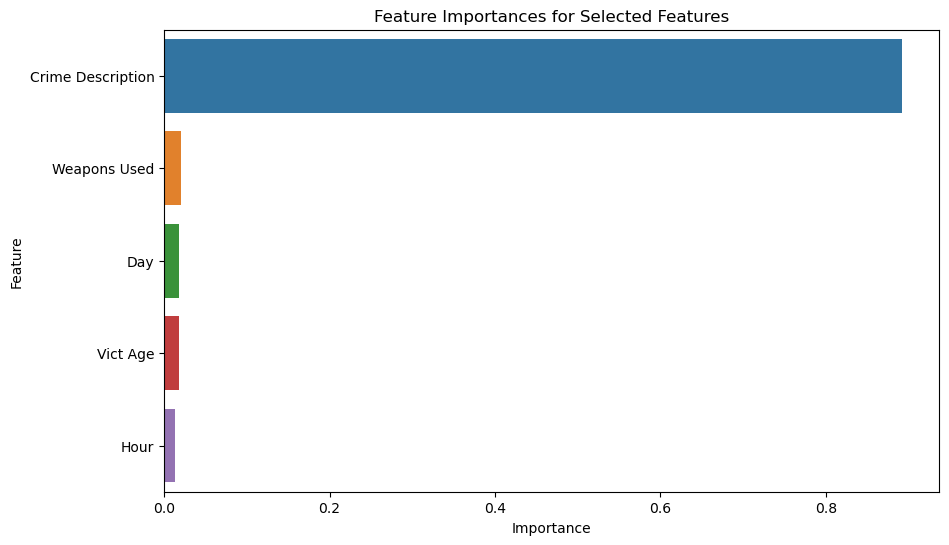

Selected features: ['Vict Age', 'Weapons Used', 'Hour', 'Day', 'Crime Description']


In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

X = df_select.drop('Severity', axis=1)
y = df_select['Severity'] 

label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    X[col] = label_encoders[col].fit_transform(X[col])

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)

feature_importances = rf.feature_importances_

selector = SelectFromModel(rf, threshold='median')
selector.fit(X, y)

selected_features_mask = selector.get_support()

selected_feature_names = X.columns[selected_features_mask]

selected_feature_importances = feature_importances[selected_features_mask]
feature_importance_df_selected = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': selected_feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_selected)
plt.title('Feature Importances for Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Selected features:", selected_feature_names.tolist())


## Selected Features after Feature Importance Analysis

In [99]:
df_select_1=df_select[['Vict Age', 'Weapons Used', 'Hour', 'Day', 'Crime Description', 'Severity']]

## Linear Regression

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X = df_select_1.drop('Severity', axis=1)
y = df_select_1['Severity']

categorical_features = ['Crime Description']
numeric_features = ['Vict Age', 'Weapons Used', 'Hour', 'Day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(df_select_1, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred_linear = pipeline.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

metrics_linear = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_linear, rmse_linear, mae_linear, r2_linear]
})

# Print the metrics
print(metrics_linear)


  Metric     Value
0    MSE  0.201627
1   RMSE  0.449029
2    MAE  0.291769
3     R2  0.910838


## Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])


decision_tree_pipeline.fit(X_train, y_train)

y_pred_tree = decision_tree_pipeline.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

metrics_tree = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_tree, rmse_tree, mae_tree, r2_tree]
})

print(metrics_tree)


  Metric     Value
0    MSE  0.358755
1   RMSE  0.598961
2    MAE  0.362739
3     R2  0.841353


## Decision Tree Regressor after Tuning

In [ ]:


from sklearn.model_selection import GridSearchCV
param_grid_dt = {
    'regressor__max_depth': [None, 5, 10, 15],  
    'regressor__min_samples_split': [2, 5, 10],  
    'regressor__min_samples_leaf': [1, 2, 4]  
}


grid_search_dt = GridSearchCV(decision_tree_pipeline, param_grid_dt, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_

best_model_dt = grid_search_dt.best_estimator_

y_pred_dt_1 = best_model_dt.predict(X_test)
mse_dt_1 = mean_squared_error(y_test, y_pred_dt_1)
rmse_dt_1 = mean_squared_error(y_test, y_pred_dt_1, squared=False)
mae_dt_1 = mean_absolute_error(y_test, y_pred_dt_1)
r2_dt_1 = r2_score(y_test, y_pred_dt_1)

print("Best Parameters for Decision Tree:", best_params_dt)
metrics_dt_1 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_dt_1, rmse_dt_1, mae_dt_1, r2_dt_1]
})
print(metrics_dt_1)


## Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

random_forest_pipeline.fit(X_train, y_train)

y_pred_rf = random_forest_pipeline.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

metrics_rf = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_rf, rmse_rf, mae_rf, r2_rf]
})

print(metrics_rf)


  Metric     Value
0    MSE  0.249129
1   RMSE  0.499128
2    MAE  0.318464
3     R2  0.889831


## Random Forest Regressor after Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'regressor__n_estimators': [100, 200], 
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],  
    'regressor__min_samples_leaf': [1, 2]
}


grid_search_rf = GridSearchCV(random_forest_pipeline, param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_model_rf = grid_search_rf.best_estimator_

y_pred_rf_1 = best_model_rf.predict(X_test)
mse_rf_1 = mean_squared_error(y_test, y_pred_rf_1)
rmse_rf_1 = mean_squared_error(y_test, y_pred_rf_1, squared=False)
mae_rf_1 = mean_absolute_error(y_test, y_pred_rf_1)
r2_rf_1 = r2_score(y_test, y_pred_rf_1)

print("Best Parameters for Random Forest:", best_params_rf)
metrics_rf_1 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_rf_1, rmse_rf_1, mae_rf_1, r2_rf_1]
})
print(metrics_rf_1)


C:\software\anaconda\New folder\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for Random Forest: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
  Metric     Value
0    MSE  0.249129
1   RMSE  0.499128
2    MAE  0.318464
3     R2  0.889831


## Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gradient_boosting_pipeline.fit(X_train, y_train)

y_pred_gb = gradient_boosting_pipeline.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

metrics_gb = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_gb, rmse_gb, mae_gb, r2_gb]
})

print("Metrics before tuning for Gradient Boosting Regression:")
print(metrics_gb)

Metrics before tuning for Gradient Boosting Regression:
  Metric     Value
0    MSE  0.196679
1   RMSE  0.443485
2    MAE  0.286146
3     R2  0.913026


## Gradient Boosting Regressor after Tuning

In [106]:
param_grid_gb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 4],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 3],
    'regressor__max_features': ['sqrt', None]
}

grid_search_gb = GridSearchCV(gradient_boosting_pipeline, param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_

best_model_gb = grid_search_gb.best_estimator_

y_pred_gb_1 = best_model_gb.predict(X_test)
mse_gb_1 = mean_squared_error(y_test, y_pred_gb_1)
rmse_gb_1 = mean_squared_error(y_test, y_pred_gb_1, squared=False)
mae_gb_1 = mean_absolute_error(y_test, y_pred_gb_1)
r2_gb_1 = r2_score(y_test, y_pred_gb_1)

print("\nBest Parameters for Gradient Boosting after tuning:")
print(best_params_gb)
metrics_gb_1 = pd.DataFrame({
    'Metric': ['MSE_1', 'RMSE_1', 'MAE_1', 'R2_1'],
    'Value': [mse_gb_1, rmse_gb_1, mae_gb_1, r2_gb_1]
})
print("\nMetrics after tuning for Gradient Boosting Regression:")
print(metrics_gb_1)

C:\software\anaconda\New folder\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Best Parameters for Gradient Boosting after tuning:
{'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}

Metrics after tuning for Gradient Boosting Regression:
   Metric     Value
0   MSE_1  0.580425
1  RMSE_1  0.761856
2   MAE_1  0.558349
3    R2_1  0.743327


## AdaBoost Regressor

In [107]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), random_state=42))
])

adaboost_pipeline.fit(X_train, y_train)

y_pred_ab = adaboost_pipeline.predict(X_test)

mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = mean_squared_error(y_test, y_pred_ab, squared=False)
mae_ab = mean_absolute_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

metrics_ab = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_ab, rmse_ab, mae_ab, r2_ab]
})
print("Initial AdaBoost Metrics:")
print(metrics_ab)

C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Initial AdaBoost Metrics:
  Metric     Value
0    MSE  0.252220
1   RMSE  0.502215
2    MAE  0.364859
3     R2  0.888464


## AdaBoost Regressor after Tuning

In [108]:
param_grid_ab = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 1],
    'regressor__base_estimator__max_depth': [3, 4, 5]
}

grid_search_ab = GridSearchCV(adaboost_pipeline, param_grid_ab, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_ab.fit(X_train, y_train)

best_params_ab = grid_search_ab.best_params_
best_model_ab = grid_search_ab.best_estimator_

y_pred_ab_1 = best_model_ab.predict(X_test)
mse_ab_1 = mean_squared_error(y_test, y_pred_ab_1)
rmse_ab_1 = mean_squared_error(y_test, y_pred_ab_1, squared=False)
mae_ab_1 = mean_absolute_error(y_test, y_pred_ab_1)
r2_ab_1 = r2_score(y_test, y_pred_ab_1)

metrics_ab_1 = pd.DataFrame({
    'Metric': ['MSE_1', 'RMSE_1', 'MAE_1', 'R2_1'],
    'Value': [mse_ab_1, rmse_ab_1, mae_ab_1, r2_ab_1]
})
print("\nTuned AdaBoost Metrics:")
print(metrics_ab_1)

C:\software\anaconda\New folder\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Tuned AdaBoost Metrics:
   Metric     Value
0   MSE_1  0.215085
1  RMSE_1  0.463773
2   MAE_1  0.310973
3    R2_1  0.904886


## XGBoost Regressor

In [109]:
import xgboost as xgb

xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

xgboost_pipeline.fit(X_train, y_train)

y_pred_xgb = xgboost_pipeline.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

metrics_xgb = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_xgb, rmse_xgb, mae_xgb, r2_xgb]
})
print("Initial XGBoost Metrics:")
print(metrics_xgb)


Initial XGBoost Metrics:
  Metric     Value
0    MSE  0.201467
1   RMSE  0.448850
2    MAE  0.290275
3     R2  0.910908


## XGBoost Regressor after Tuning

In [110]:
param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.5],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_child_weight': [1, 2, 3]
}

grid_search_xgb = GridSearchCV(xgboost_pipeline, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

y_pred_xgb_1 = best_model_xgb.predict(X_test)
mse_xgb_1 = mean_squared_error(y_test, y_pred_xgb_1)
rmse_xgb_1 = mean_squared_error(y_test, y_pred_xgb_1, squared=False)
mae_xgb_1 = mean_absolute_error(y_test, y_pred_xgb_1)
r2_xgb_1 = r2_score(y_test, y_pred_xgb_1)

metrics_xgb_1 = pd.DataFrame({
    'Metric': ['MSE_1', 'RMSE_1', 'MAE_1', 'R2_1'],
    'Value': [mse_xgb_1, rmse_xgb_1, mae_xgb_1, r2_xgb_1]
})
print("\nTuned XGBoost Metrics:")
print(metrics_xgb_1)

C:\software\anaconda\New folder\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Tuned XGBoost Metrics:
   Metric     Value
0   MSE_1  0.488894
1  RMSE_1  0.699209
2   MAE_1  0.506561
3    R2_1  0.783804


In [111]:
import pandas as pd

models = [
    ('Linear', metrics_linear),
    ('Random Forest', metrics_random),
    ('Decision Tree', metrics_tree),
    ('Decision Tree Tuned', metrics_dt_1),
    ('Random Forest Tuned', metrics_rf_1),
    ('Gradient Boost', metrics_gb),
    ('Gradient Boost Tuned', metrics_gb_1),
    ('AdaBoost', metrics_ab),
    ('AdaBoost Tuned', metrics_ab_1),
    ('XGBoost', metrics_xgb),
    ('XGBoost Tuned', metrics_xgb_1)
]

data = []

for name, metrics in models:
  
    r2_score = metrics.iloc[3]['Value'] 
    data.append({'Model': name, 'R² Score': r2_score})

df_r2_scores = pd.DataFrame(data)

print(df_r2_scores)


                   Model  R² Score
0                 Linear  0.910838
1          Random Forest  0.913039
2          Decision Tree  0.841353
3    Decision Tree Tuned  0.841353
4    Random Forest Tuned  0.889831
5         Gradient Boost  0.913026
6   Gradient Boost Tuned  0.743327
7               AdaBoost  0.888464
8         AdaBoost Tuned  0.904886
9                XGBoost  0.910908
10         XGBoost Tuned  0.783804


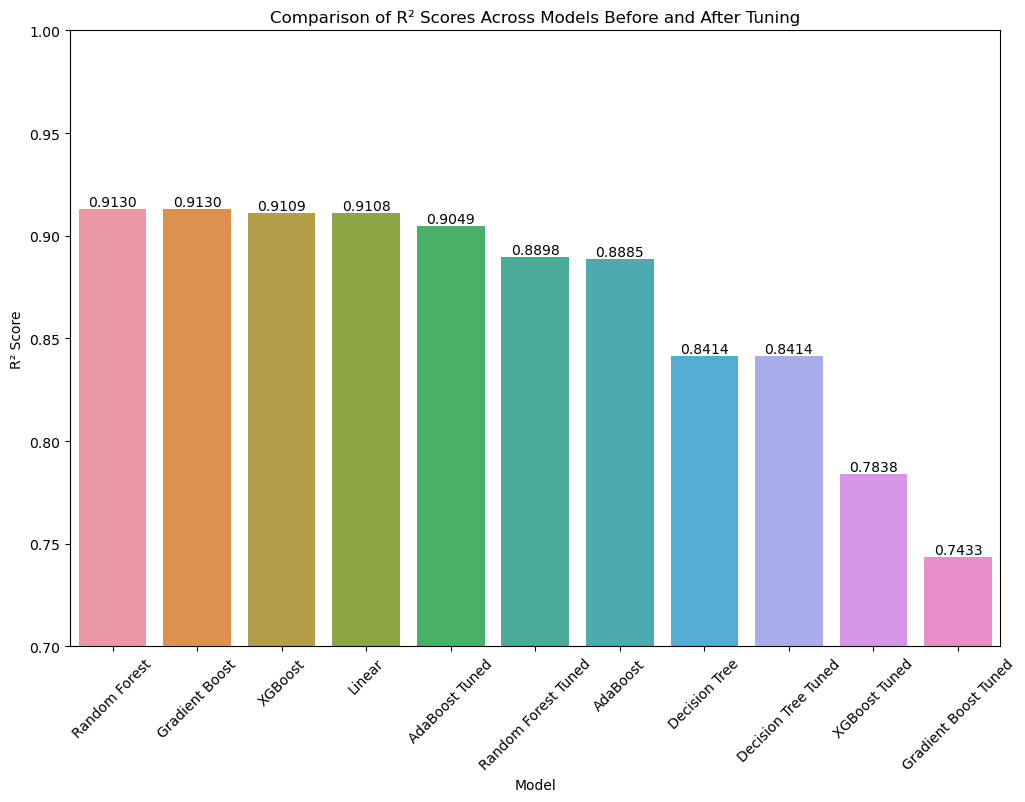

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='Model', y='R² Score', data=df_r2_scores.sort_values('R² Score', ascending=False))

plt.title('Comparison of R² Scores Across Models Before and After Tuning')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0.7, 1)
plt.xticks(rotation=45)  

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  
             bar.get_height(),  
             f'{bar.get_height():.4f}',  
             ha='center',  
             va='bottom', 
             color='black',  
             fontsize=10)  

plt.show()

In [113]:
import pandas as pd

models = [
    ('Linear', metrics_linear),
    ('Random Forest', metrics_random),
    ('Decision Tree', metrics_tree),
    ('Decision Tree Tuned', metrics_dt_1),
    ('Random Forest Tuned', metrics_rf_1),
    ('Gradient Boost', metrics_gb),
    ('Gradient Boost Tuned', metrics_gb_1),
    ('AdaBoost', metrics_ab),
    ('AdaBoost Tuned', metrics_ab_1),
    ('XGBoost', metrics_xgb),
    ('XGBoost Tuned', metrics_xgb_1)
]

data = [] 

for name, metrics in models:
    mse = metrics.iloc[0]['Value'] 
    rmse = metrics.iloc[1]['Value']  
    mae = metrics.iloc[2]['Value'] 
    data.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    })

df_metrics = pd.DataFrame(data)
print(df_metrics)


                   Model       MSE      RMSE       MAE
0                 Linear  0.201627  0.449029  0.291769
1          Random Forest  0.196649  0.443452  0.274864
2          Decision Tree  0.358755  0.598961  0.362739
3    Decision Tree Tuned  0.358755  0.598961  0.362739
4    Random Forest Tuned  0.249129  0.499128  0.318464
5         Gradient Boost  0.196679  0.443485  0.286146
6   Gradient Boost Tuned  0.580425  0.761856  0.558349
7               AdaBoost  0.252220  0.502215  0.364859
8         AdaBoost Tuned  0.215085  0.463773  0.310973
9                XGBoost  0.201467  0.448850  0.290275
10         XGBoost Tuned  0.488894  0.699209  0.506561


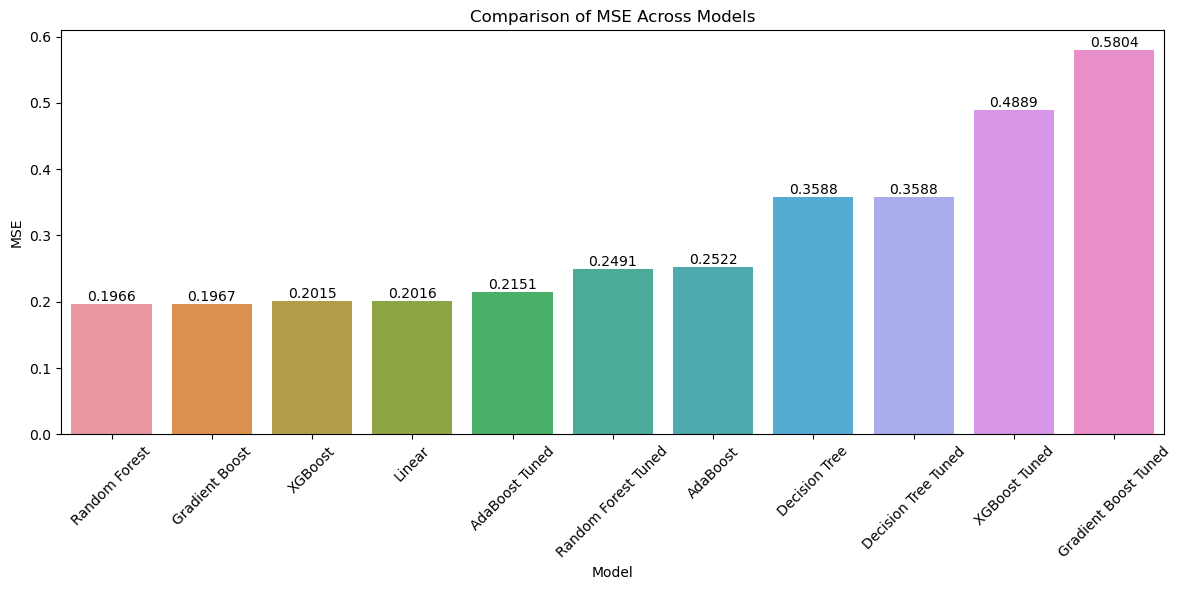

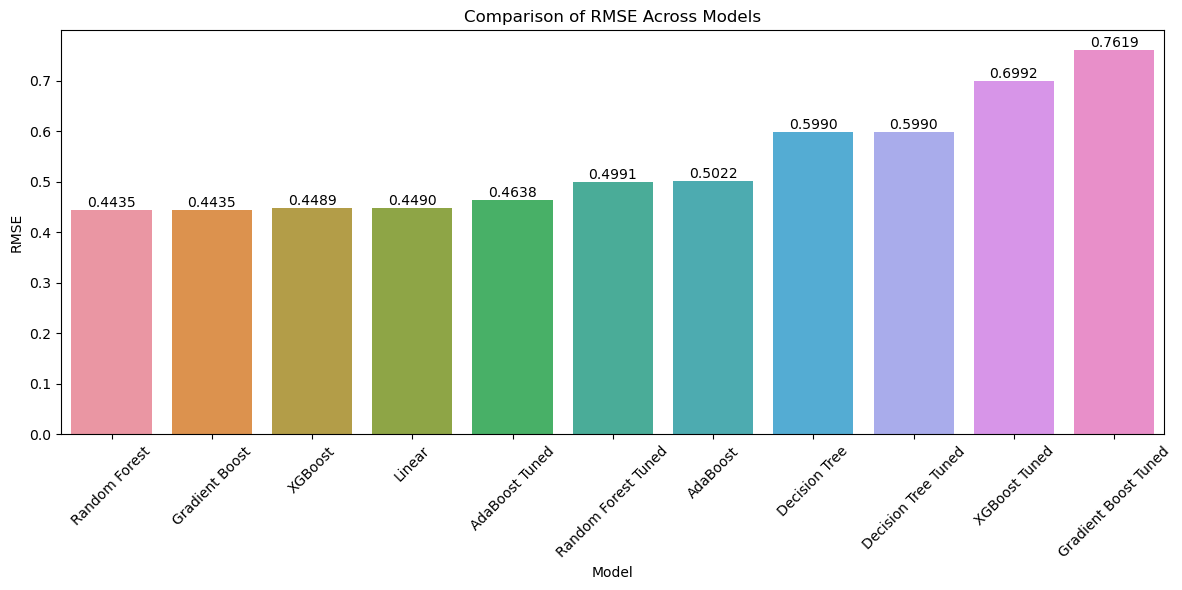

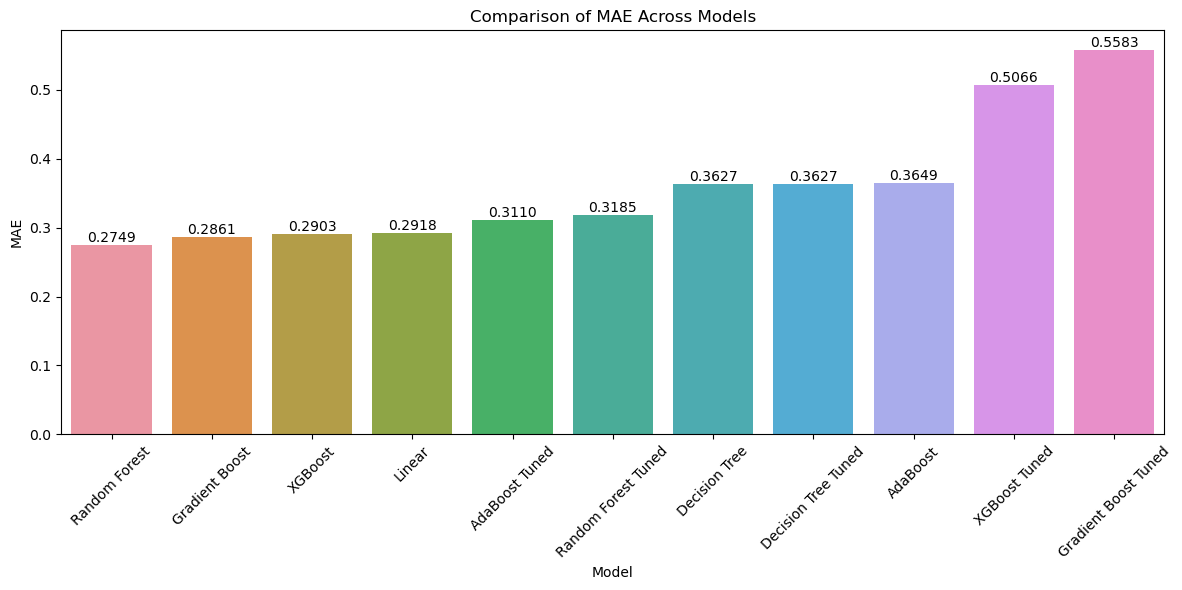

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric(df, metric):
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x='Model', y=metric, data=df.sort_values(by=metric, ascending=True if metric != 'R² Score' else False))
    plt.title(f'Comparison of {metric} Across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

    for bar in bar_plot.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height(), 
                 f'{bar.get_height():.4f}', 
                 ha='center', va='bottom', color='black', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_metric(df_metrics, 'MSE')
plot_metric(df_metrics, 'RMSE')
plot_metric(df_metrics, 'MAE')


The Random Forest and Gradient Boost models outperform the other models in terms of prediction accuracy; they have the lowest error metrics and the highest R2 scores. They are the greatest options for strong and trustworthy predictions because of their capacity to explain about 91% of the variance in the dataset and their decreased mean errors.
This study successfully mapped major predictors to crime severity through rigorous evaluation utilizing a variety of machine learning models, providing law enforcement with useful insights to foresee and prevent high-risk circumstances. The outstanding results of models such as Random Forest and Gradient Boost in our investigation show how much more effective modern prediction techniques are in improving public safety measures. 
